In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
nGPUs = ("1","2","4")
x = np.arange(len(nGPUs))

## Overall runtime

Text(0, 0.5, 'Elapsed time')

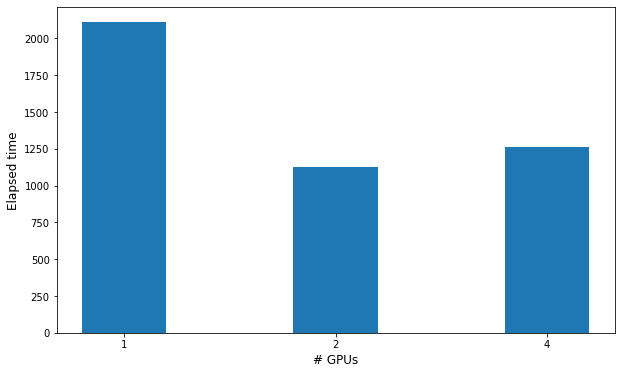

In [42]:
data = (2110.694652, 1126.125608, 1262.04522)

width = 0.40
fig = plt.subplots(figsize =(10, 6))
plt.bar(nGPUs, data, width=width)
plt.xlabel("# GPUs", fontsize = 12)
plt.ylabel("Elapsed time", fontsize = 12)

## xx

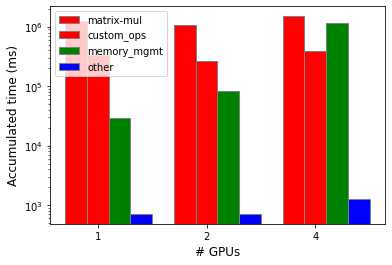

In [7]:
barWidth = 0.2
fig = plt.subplots(figsize =(6, 4))
 
# set height of bar


custom_ops = [3.353394e+05, 2.647523e+05, 3.837383e+05]
gemm = [1.263133e+06, 1.086257e+06, 1.501899e+06]
memory_mgmt = [2.898688e+04, 8.338094e+04, 1.147016e+06]
other = [7.158498e+02, 7.104206e+02, 1.270684e+03]
 
# Set position of bar on X axis
br1 = np.arange(len(custom_ops))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
 
# Make the plot
plt.bar(br1, gemm, color ='r', width = barWidth,
        edgecolor ='grey', label ='matrix-mul')
plt.bar(br2, custom_ops, color ='r', width = barWidth,
        edgecolor ='grey', label ='custom_ops')
plt.bar(br3, memory_mgmt, color ='g', width = barWidth,
        edgecolor ='grey', label ='memory_mgmt')
plt.bar(br4, other, color ='b', width = barWidth,
    edgecolor ='grey', label ='other')
 
    
# Adding Xticks
plt.xlabel('# GPUs', fontsize = 12)
plt.ylabel('Accumulated time (ms)', fontsize = 12)
plt.xticks([r + barWidth for r in range(len(nGPUs))], nGPUs)
plt.yscale("log")

plt.legend()
plt.savefig("timegroup.pdf")
plt.show()

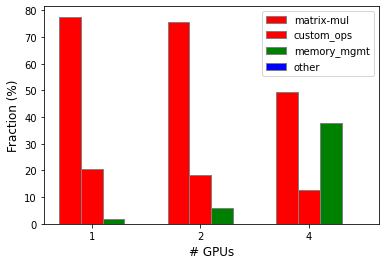

In [9]:
barWidth = 0.2
fig = plt.subplots(figsize =(6, 4))
 
# set height of bar


custom_ops = [3.353394e+05, 2.647523e+05, 3.837383e+05]
gemm = [1.263133e+06, 1.086257e+06, 1.501899e+06]
memory_mgmt = [2.898688e+04, 8.338094e+04, 1.147016e+06]
other = [7.158498e+02, 7.104206e+02, 1.270684e+03]

for i,c,g,m,o in zip(range(len(custom_ops)), custom_ops, gemm, memory_mgmt, other):
    total = c + g + m +o 
    custom_ops[i] = c / total * 100.0
    gemm[i] = g / total * 100.0
    memory_mgmt[i] = m / total * 100.0
    other[i] = o / total * 100.0
 
# Set position of bar on X axis
br1 = np.arange(len(custom_ops))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
 
# Make the plot
plt.bar(br1, gemm, color ='r', width = barWidth,
        edgecolor ='grey', label ='matrix-mul')
plt.bar(br2, custom_ops, color ='r', width = barWidth,
        edgecolor ='grey', label ='custom_ops')
plt.bar(br3, memory_mgmt, color ='g', width = barWidth,
        edgecolor ='grey', label ='memory_mgmt')
plt.bar(br4, other, color ='b', width = barWidth,
    edgecolor ='grey', label ='other')
 
    
# Adding Xticks
plt.xlabel('# GPUs', fontsize = 12)
plt.ylabel('Fraction (%)', fontsize = 12)
plt.xticks([r + barWidth for r in range(len(nGPUs))], nGPUs)

plt.legend()
plt.savefig("timegroup_frac.pdf")
plt.show()

## Communication Overhead

### 2 GPUs

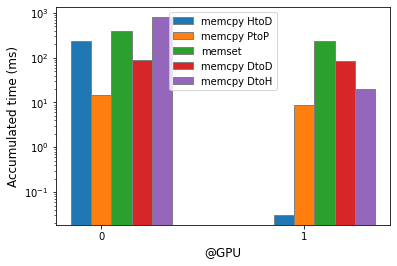

In [10]:
gpu_idxs = range(2)
data = {
    "memcpy HtoD": [233.385289, 0.030880],
    "memcpy PtoP": [14.688760, 8.928476],
    "memset": [385.469792, 240.549497],
    "memcpy DtoD": [89.724055, 84.613114],
    "memcpy DtoH": [801.296856, 20.104820],
}

barWidth = 0.1
fig = plt.subplots(figsize =(6, 4))

_br = np.arange(len(data["memset"]))
brs = [_br, ]
for i in range(1, len(data)):
    brs.append([x + barWidth for x in brs[-1]])

for br, name, times in zip(brs, list(data.keys()), list(data.values())):
    plt.bar(br, times, width = barWidth,
        edgecolor ='grey', label =name)
    
# Adding Xticks
plt.xlabel('@GPU', fontsize = 12)
plt.ylabel('Accumulated time (ms)', fontsize = 12)
plt.xticks([r + barWidth for r in gpu_idxs], gpu_idxs)
plt.yscale("log")

plt.legend()
plt.savefig("mem_2gpus.pdf")
plt.show()

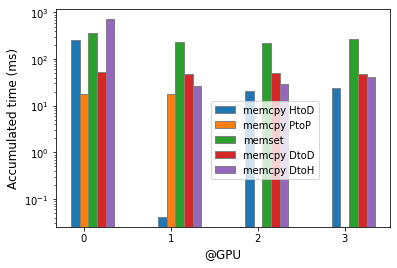

In [18]:
gpu_idxs = range(4)
data = {
    "memcpy HtoD": [251.789394, 0.041376, 20.850114, 23.934569],
    "memcpy PtoP": [18.229265, 18.229265, 0, 0],
    "memset": [371.851850, 228.911131, 217.912401, 268.138082],
    "memcpy DtoD": [53.578110, 48.148365, 49.474574, 48.688193],
    "memcpy DtoH": [715.516177, 27.113958, 28.881034, 42.206686],
}

barWidth = 0.1
fig = plt.subplots(figsize =(6, 4))

_br = np.arange(len(data["memset"]))
brs = [_br, ]
for i in range(1, len(data)):
    brs.append([x + barWidth for x in brs[-1]])

for br, name, times in zip(brs, list(data.keys()), list(data.values())):
    plt.bar(br, times, width = barWidth,
        edgecolor ='grey', label =name)
    
# Adding Xticks
plt.xlabel('@GPU', fontsize = 12)
plt.ylabel('Accumulated time (ms)', fontsize = 12)
plt.xticks([r + barWidth for r in gpu_idxs], gpu_idxs)
plt.yscale("log")

plt.legend(bbox_to_anchor=(0.8, 0.6))
plt.savefig("mem_4gpus.pdf")
plt.show()